## Project Title
House Price Prediction Using A Random Forest model

## Importing Libraries and Loading the Data

In [2]:
# Data Manipulation and Analysis
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt

# Data Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Model Training and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Model Persistence
import pickle

In [6]:
# Load the data
housing = pd.read_csv('../data/housing.csv')

# Display the first 5 rows of the data
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Exploratory data analysis

In [8]:
# Column information of the dataset
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [12]:
# Summary Statistics of The Dataset
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


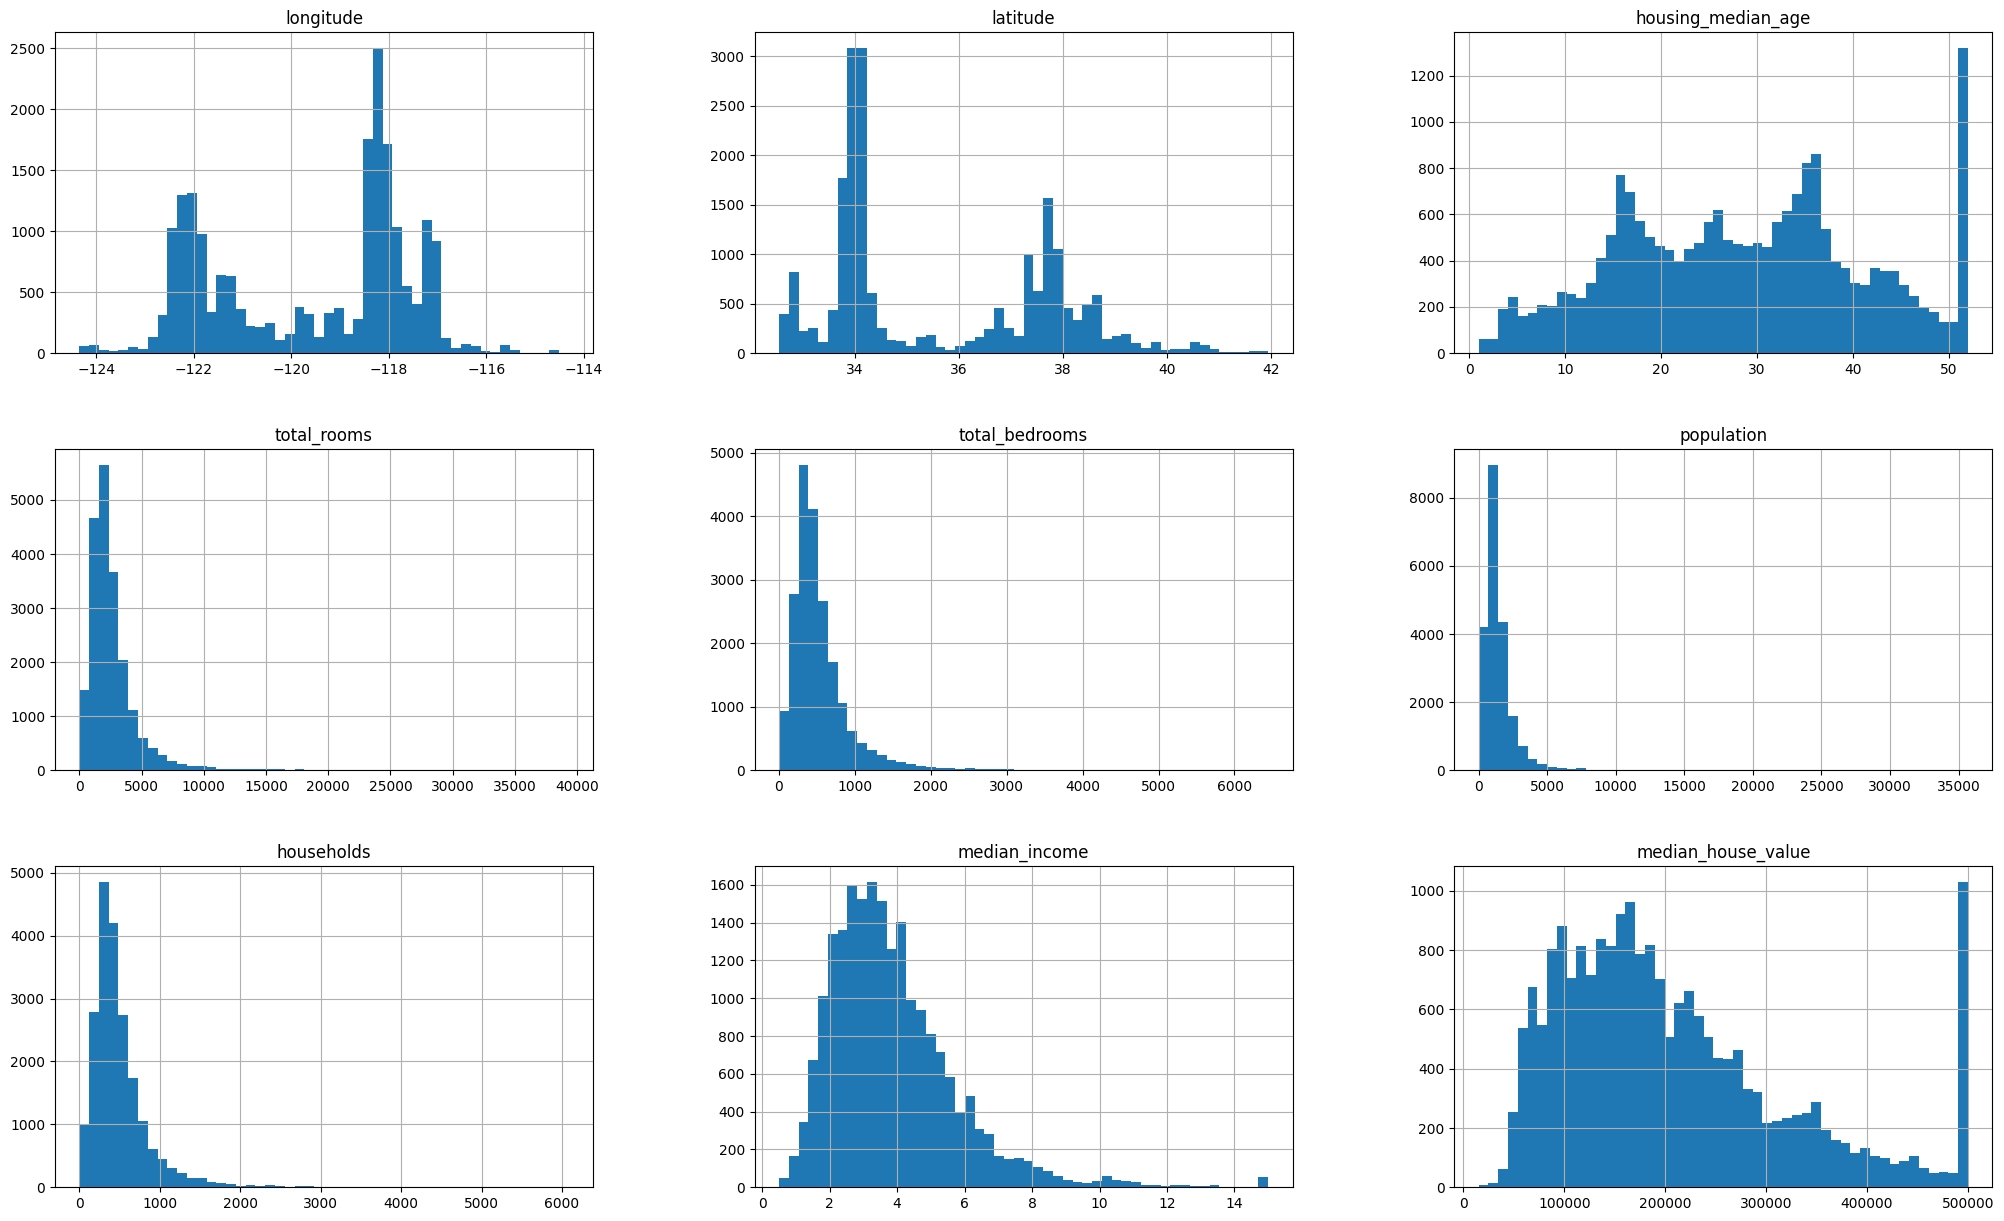

In [14]:
# Understanding the Dataset: Finding Missing values and non numerical features
housing.hist(bins=50, figsize=(25,15))
plt.show()

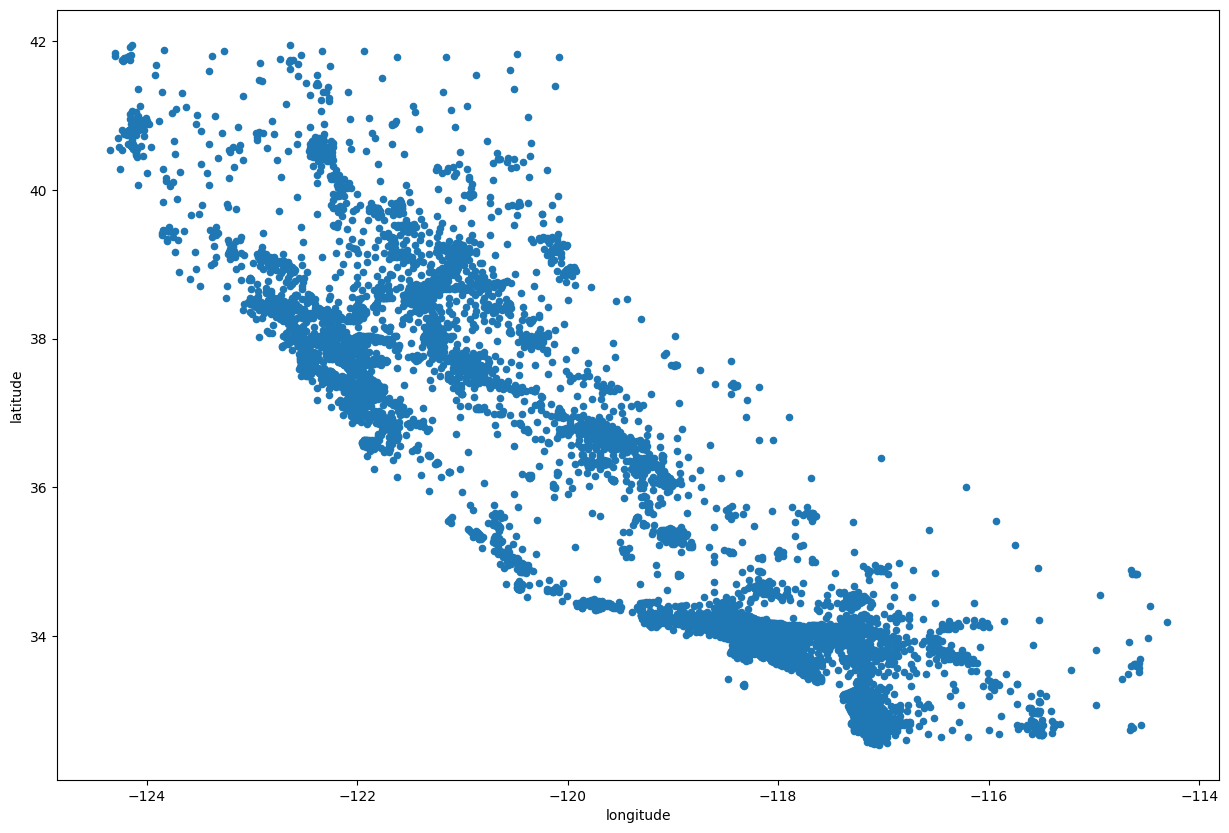

In [16]:
housing.plot(kind='scatter',x='longitude', y='latitude', figsize=(15,10))
plt.show()

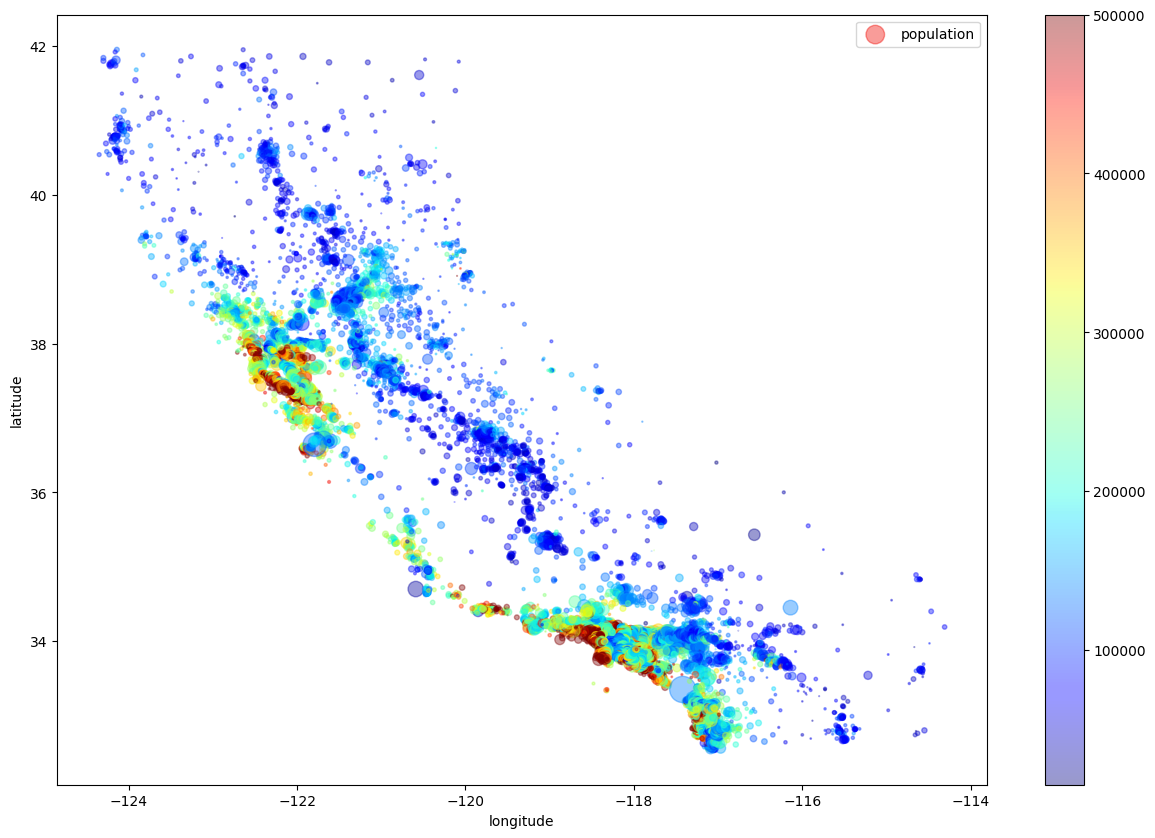

In [18]:
housing.plot(kind='scatter',x='longitude', y='latitude', alpha=0.4, s=housing['population']/100, label='population',
             figsize=(15,10), c=housing['median_house_value'], cmap=plt.get_cmap('jet'), colorbar=True )
plt.legend()
plt.show()

In [21]:
#further dataset exploration
corr_matrix = housing.select_dtypes(include=["number"]).corr()

corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

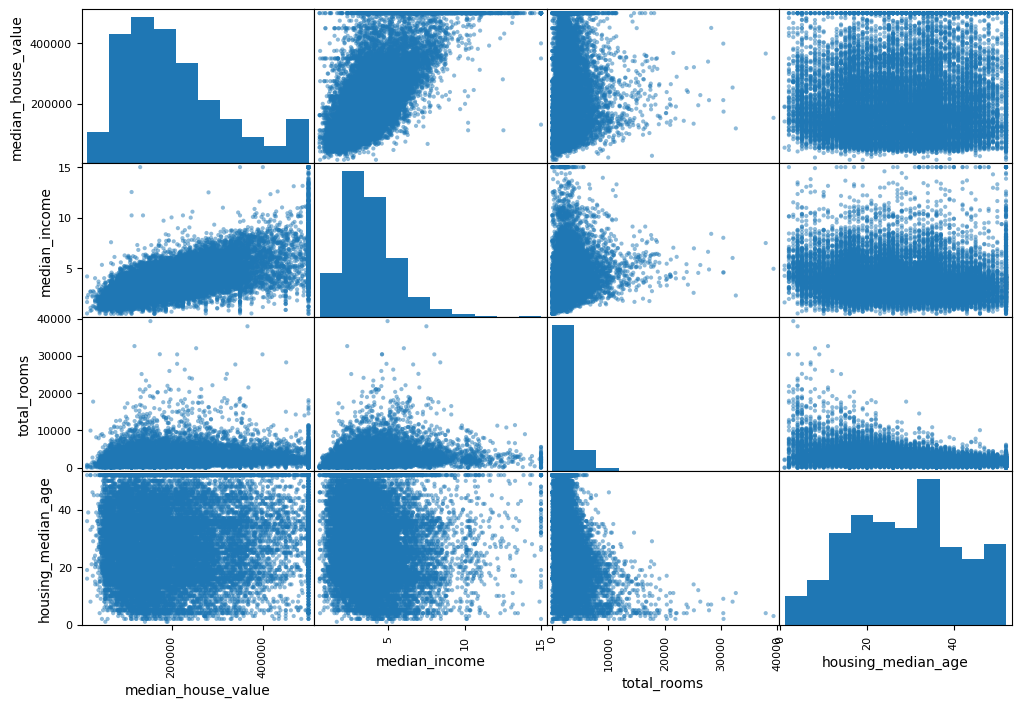

In [23]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

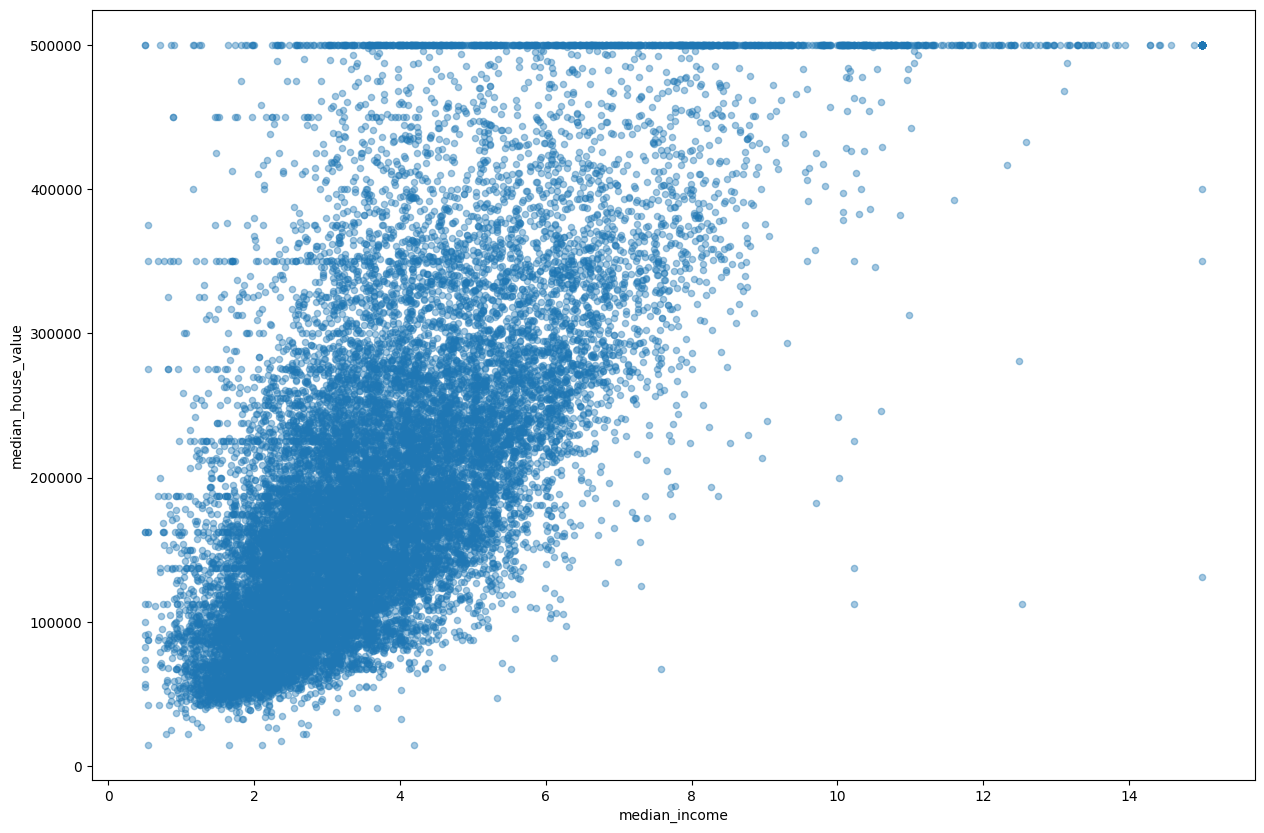

In [25]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.4, figsize=(15,10) )
plt.show()

## Split data into training and testing sets

In [27]:
#Spliting dataset into training set and testing set
train, test = train_test_split(housing, test_size = 0.2, random_state = 42)

In [29]:
# Check the size of the training and test sets with the shape() function:
train.shape, test.shape

((16512, 10), (4128, 10))

The training set has 16512 rows and 10 features (or 80% of the whole dataset) and test set has 4128 rows and also 10 features (or 20% of the whole dataset).

## Data Cleaning:

In [31]:
# Check for missing data/values
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

The 'total_bedrooms' column has 207 missing values. We will fill in the missing values with the median value of the column using the SimpleImputer from Sklearn. Check the Dtype of each column to ensure they're all numerical values since the median canonly be a numerical attribute.

In [32]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


The ocean_proximity column does not have numerical values, instead it has text attributes. Therefore, we create a copy of the data without this column.

In [34]:
# Use the SimpleImputer method to impute in the missing values in the total_bedrooms columns with the median value in the column

imputer = SimpleImputer(strategy="median")

# Create a copy of the data without the text attribute ocean_proximity
test_num = test.drop("ocean_proximity", axis=1)
test_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4128 entries, 20046 to 3665
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      3921 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   median_house_value  4128 non-null   float64
dtypes: float64(9)
memory usage: 322.5 KB


The ocean_proximity column has been dropped.

In [36]:
# fit the imputer instance to the training data using the fit() method
imputer.fit(test_num)

SimpleImputer(strategy='median')

In [38]:
imputer.statistics_

array([-1.1847e+02,  3.4230e+01,  2.9000e+01,  2.1100e+03,  4.2800e+02,
        1.1600e+03,  4.0600e+02,  3.5000e+00,  1.7865e+05])

In [39]:
# Validate the mean to confirm if the imputer has correctly calculated the median using Python's .median() function
test_num.median().values

array([-1.1847e+02,  3.4230e+01,  2.9000e+01,  2.1100e+03,  4.2800e+02,
        1.1600e+03,  4.0600e+02,  3.5000e+00,  1.7865e+05])

In [40]:
# Use the test-data imputer to transform the test data set by replacing the missing values by the learned values.
X = imputer.transform(test_num)

In [41]:
# Convert the test data from a numpy array to a pandas dataframe
test_tr = pd.DataFrame(X, columns = test_num.columns)
test_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-119.01,36.06,25.0,1505.0,428.0,1392.0,359.0,1.6812,47700.0
1,-119.46,35.14,30.0,2943.0,428.0,1565.0,584.0,2.5313,45800.0
2,-122.44,37.80,52.0,3830.0,428.0,1310.0,963.0,3.4801,500001.0
3,-118.72,34.28,17.0,3051.0,428.0,1705.0,495.0,5.7376,218600.0
4,-121.93,36.62,34.0,2351.0,428.0,1063.0,428.0,3.7250,278000.0
...,...,...,...,...,...,...,...,...,...
4123,-117.22,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050,263300.0
4124,-120.83,35.36,28.0,4323.0,886.0,1650.0,705.0,2.7266,266800.0
4125,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,500001.0
4126,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,72300.0


## Feature Engineering

In [42]:
# Creating new features or transforming existing features to better represent the underlying patterns in the data.

test["rooms_per_household"]=test["total_rooms"]/test["households"]
test["bedrooms_per_room"]=test["total_bedrooms"]/test["total_rooms"]
test["population_per_household"]=test["population"]/test["households"]
test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND,4.192201,NaN,3.877437
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND,5.039384,NaN,2.679795
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY,3.977155,NaN,1.360332
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN,6.163636,NaN,3.444444
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN,5.492991,NaN,2.483645
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050,263300.0,<1H OCEAN,7.002212,0.152291,2.988938
16623,-120.83,35.36,28.0,4323.0,886.0,1650.0,705.0,2.7266,266800.0,NEAR OCEAN,6.131915,0.204950,2.340426
18086,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,500001.0,<1H OCEAN,7.237676,0.130868,2.790493
2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,72300.0,INLAND,5.289030,0.185880,2.588608


## Feature Scaling

In [43]:
# Pipelining the test dataset, getting it ready for modeling
test_labels=test['median_house_value'].copy()

test=test.drop('median_house_value', axis=1)

test_num=test.drop("ocean_proximity", axis=1)

test_labels.head()

20046     47700.0
3024      45800.0
15663    500001.0
20484    218600.0
9814     278000.0
Name: median_house_value, dtype: float64

In [44]:
num_pipeline = Pipeline([('imputer',SimpleImputer(strategy="median")),('std_scaler', StandardScaler())])

test_tr = num_pipeline.fit_transform(test_num)

num_attribs = list(test_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs), ("cat",OneHotEncoder(), cat_attribs) ])
test_prepared = full_pipeline.fit_transform(test)

In [45]:
test_prepared.shape

(4128, 16)

## Modeling and Value Prediction

In [46]:
# Model Selection and Prediction : The Random Forest Regressor
from sklearn.datasets import make_regression

forest_reg = RandomForestRegressor()
X, Y = make_regression(n_features=16, n_informative=2,random_state=0, shuffle=False)
forest_reg.fit(X,Y)
test_prediction = forest_reg.predict(test_prepared)
test_prediction

array([ 27.56161085,  -2.67018333, 119.38407169, ...,  37.30703106,
        40.75515439, -30.88707859])

In [47]:
lin_reg = LinearRegression()

# calculate RMSE for test set
test_forest_mse = mean_squared_error(test_labels, test_prediction)
test_forest_rmse = np.sqrt(test_forest_mse)

# calculate RMSE scores using cross-validation
test_forest_rmse_scores = cross_val_score(forest_reg, test_prepared, test_labels, scoring='neg_mean_squared_error', cv=10)
forest_tree_rmse_scores = np.sqrt(-test_forest_rmse_scores)

# define a function to display scores
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
# display forest tree RMSE scores
display_scores(forest_tree_rmse_scores)

Scores: [54731.71624278 52926.53553836 57659.12847326 62248.30603147
 54604.46617463 51591.33921658 52421.09160565 58670.98010725
 57755.72324839 53358.60925971]
Mean: 55596.78958980724
Standard deviation: 3203.2641234838065


In [48]:
# calculate linear regression RMSE scores using cross-validation
lin_scores = cross_val_score(lin_reg, test_prepared, test_labels, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

# display linear regression RMSE scores
display_scores(lin_rmse_scores)

Scores: [67404.97038787 69127.6550799  75864.82154489 72152.56108756
 72250.30236857 64321.316356   67504.69067265 74197.44724277
 68214.96737372 71915.32682217]
Mean: 70295.40589361062
Standard deviation: 3371.4007163622177


/Users/703395844/Desktop/ML-Projects/House-Price-Prediction/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/703395844/Desktop/ML-Projects/House-Price-Prediction/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/703395844/Desktop/ML-Projects/House-Price-Prediction/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/703395844/Desktop/ML-Projects/House-Price-Prediction/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/703395844/Desktop/ML-Projects/House-Price-Prediction/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: Runtime

In [49]:
# define the hyperparameter grid for grid search
param_grid=[{'n_estimators': [3,10,30],'max_features': [2,4,6,8]}, 
            {'bootstrap': [False],'n_estimators': [3,10],'max_features': [2,3,4] } ]

# perform grid search with cross-validation
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(test_prepared, test_labels)

# print the best RMSE score and corresponding hyperparameters
cvres=grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

72868.68771377203 {'max_features': 2, 'n_estimators': 3}
61823.470212203254 {'max_features': 2, 'n_estimators': 10}
59150.1709756672 {'max_features': 2, 'n_estimators': 30}
67233.03550453261 {'max_features': 4, 'n_estimators': 3}
58641.651341025376 {'max_features': 4, 'n_estimators': 10}
56175.60101134982 {'max_features': 4, 'n_estimators': 30}
66910.60055859474 {'max_features': 6, 'n_estimators': 3}
58554.90865101034 {'max_features': 6, 'n_estimators': 10}
56171.677643135015 {'max_features': 6, 'n_estimators': 30}
65405.706429723854 {'max_features': 8, 'n_estimators': 3}
57986.00274751297 {'max_features': 8, 'n_estimators': 10}
55988.530624860345 {'max_features': 8, 'n_estimators': 30}
69527.01066390685 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
59671.28286684296 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
67682.00527241123 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
58315.14762486956 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [52]:
# Save model 
import pickle

filename = '../model/final_rf_model.sav'
pickle.dump(grid_search.best_estimator_, open(filename, 'wb'))